# Red Wine Quality Prediction Project

## Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


### Attribute Information
    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

### Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


In [37]:
# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


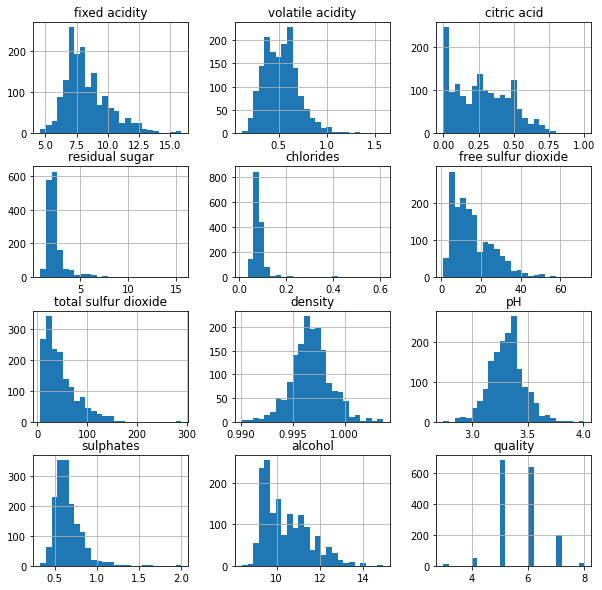

In [6]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

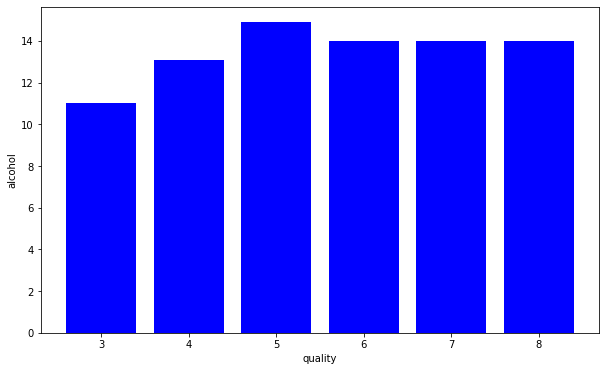

In [7]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

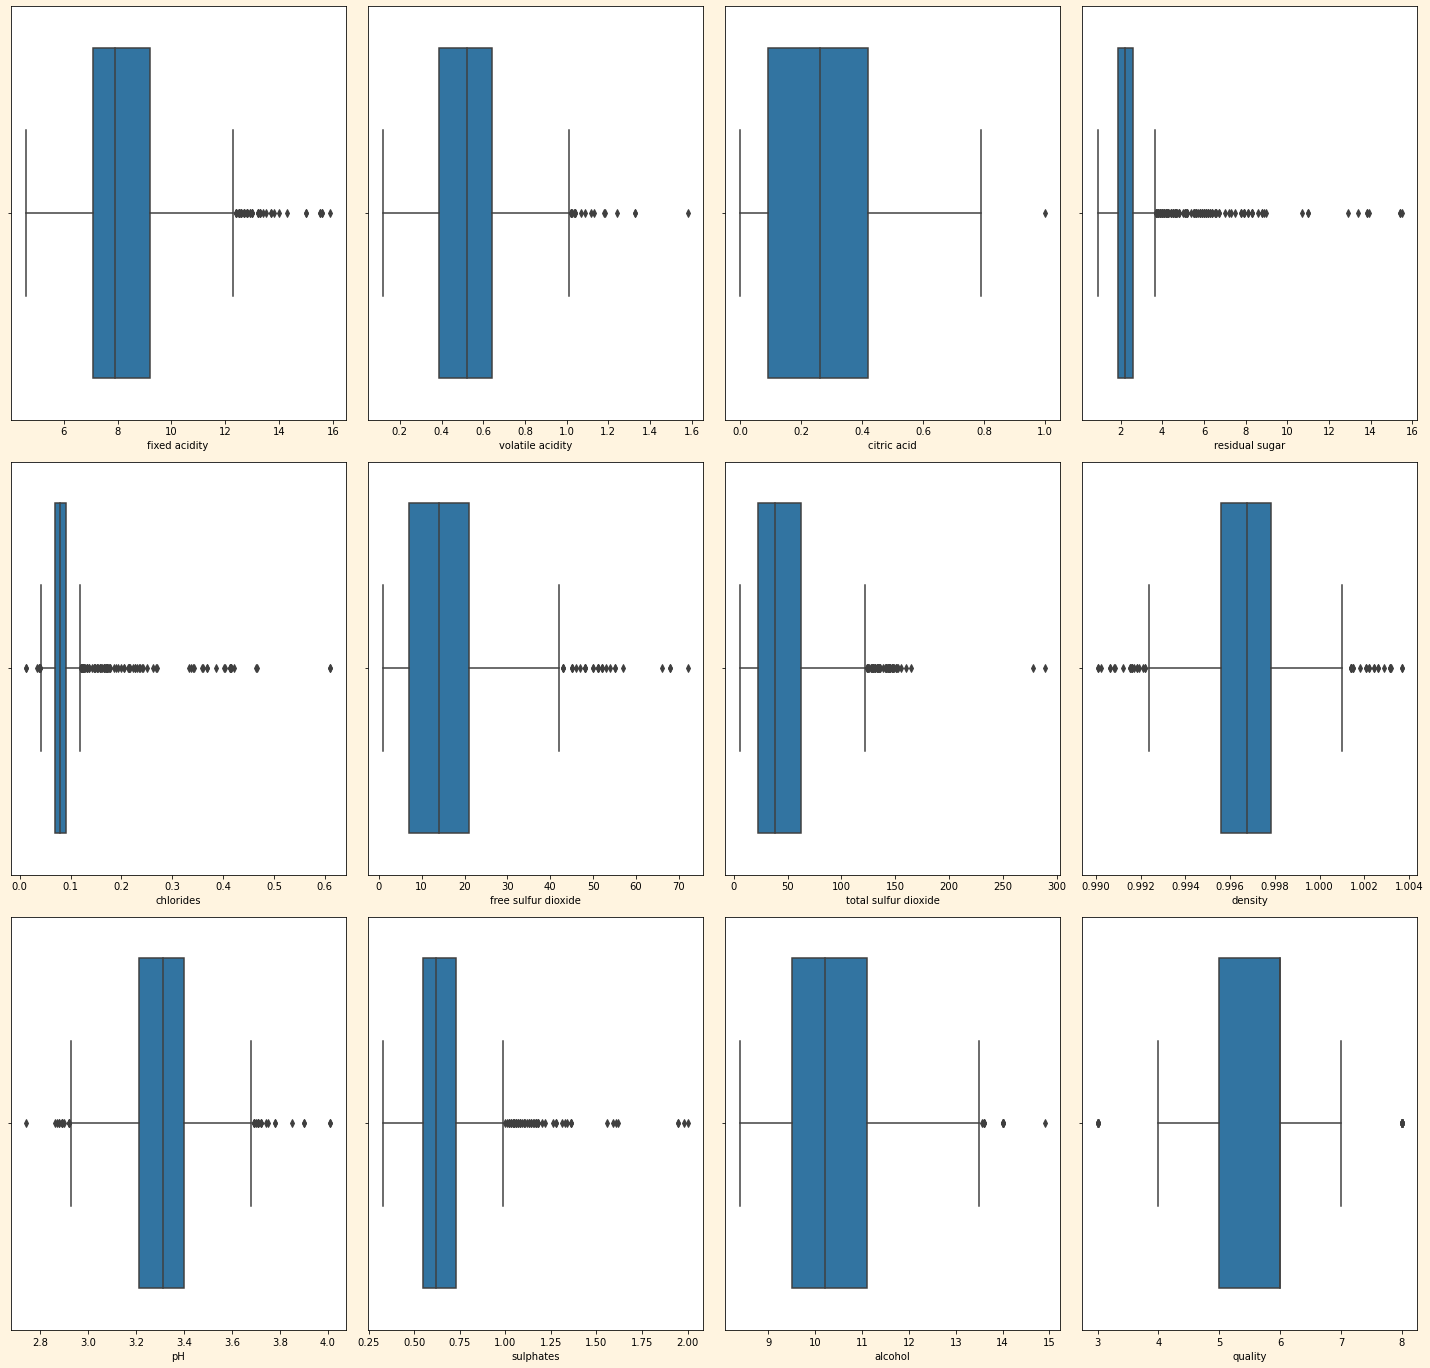

In [14]:
plt.figure(figsize=(20,25),facecolor='#FFF4E0')
plot = 1
for i in data.columns:
    if(i != 'red'):
        pl = plt.subplot(4,4,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize = 10)
        plot+=1
plt.tight_layout()
plt.show()

In [38]:
# Removing Outliers

In [15]:
new_data = data.copy()
for i in data.columns:
    percentile25 = data[i].quantile(0.25)
    percentile75 = data[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    new_data[i] = np.where(
        new_data[i]>upper_limit,upper_limit,
        np.where(
        new_data[i] < lower_limit,lower_limit,
        new_data[i]
        )
    )

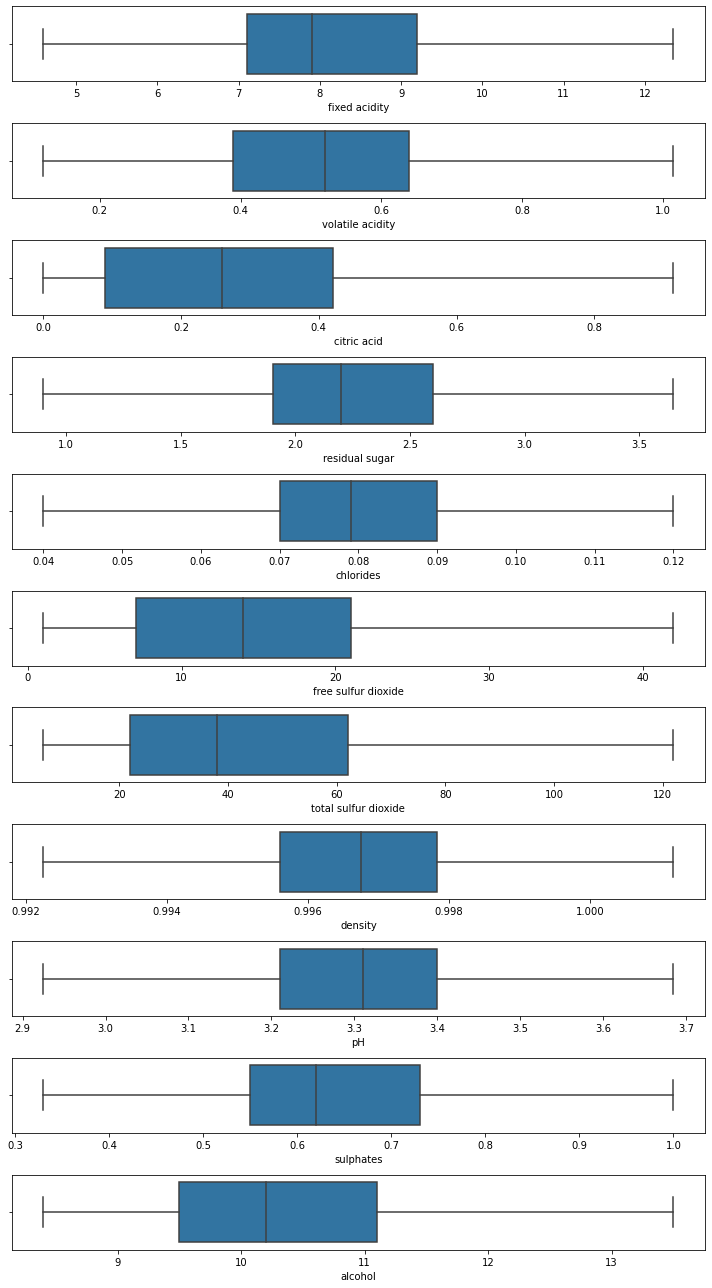

In [16]:
import warnings
with warnings.catch_warnings(record=True):
    fig,axs = plt.subplots(11,figsize=(10,18))
    plt1 = sns.boxplot(new_data['fixed acidity'],ax=axs[0])
    plt2 = sns.boxplot(new_data['volatile acidity'],ax=axs[1])
    plt3 = sns.boxplot(new_data['citric acid'],ax=axs[2])
    plt4 = sns.boxplot(new_data['residual sugar'],ax=axs[3])
    plt5 = sns.boxplot(new_data['chlorides'],ax=axs[4])
    plt6 = sns.boxplot(new_data['free sulfur dioxide'],ax=axs[5])
    plt7 = sns.boxplot(new_data['total sulfur dioxide'],ax=axs[6])
    plt8 = sns.boxplot(new_data['density'],ax=axs[7])
    plt9 = sns.boxplot(new_data['pH'],ax=axs[8])
    plt10 = sns.boxplot(new_data['sulphates'],ax=axs[9])
    plt11 = sns.boxplot(new_data['alcohol'],ax=axs[10])
    plt.tight_layout()

### Correlation:-

<AxesSubplot:>

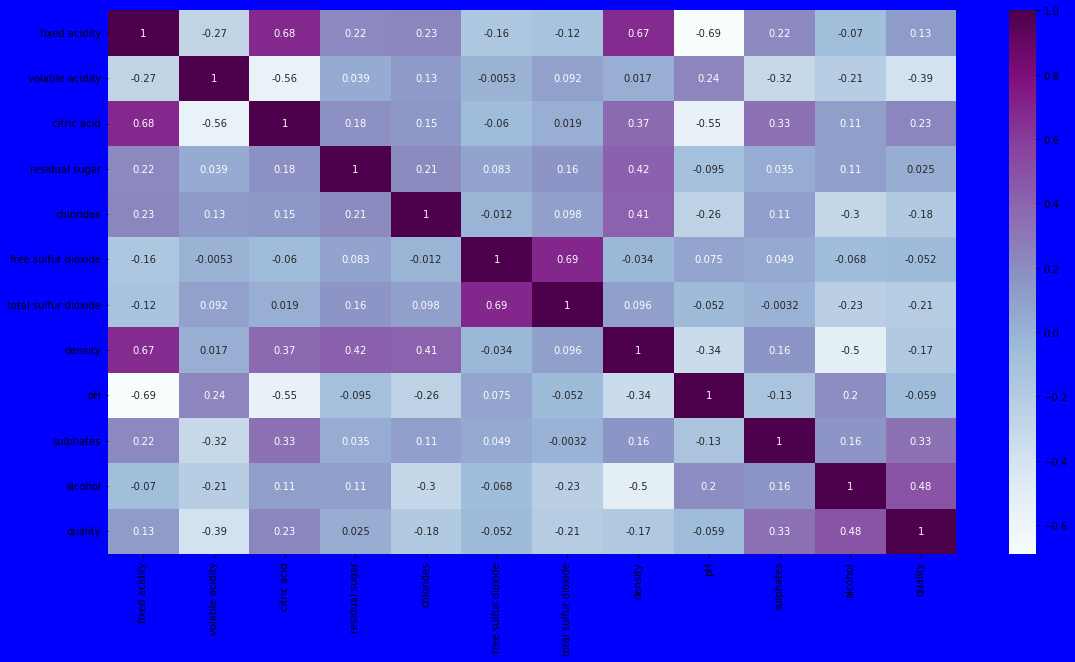

In [17]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(new_data.corr(),cmap="BuPu",annot=True)

In [18]:
new_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:

# Create Classification version of target variable
new_data['goodquality'] = [1 if x >= 7 else 0 for x in new_data['quality']]
# Separate feature variables and target variable
X = new_data.drop(['quality','goodquality'], axis = 1)
y = new_data['goodquality']

In [20]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [21]:
# Normalize feature variables
X_features = X
X = StandardScaler().fit_transform(X)

### Splitting dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model is ',round(accuracy*100,2),'%')

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print(classification_report(y_test, y_pred))

The accuracy of the model is  86.75 %
Confusion Matrix:
[[322  23]
 [ 30  25]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       345
           1       0.52      0.45      0.49        55

    accuracy                           0.87       400
   macro avg       0.72      0.69      0.70       400
weighted avg       0.86      0.87      0.86       400



<AxesSubplot:>

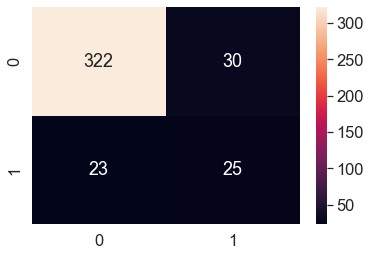

In [26]:
sns.set(font_scale=1.5)
cm = confusion_matrix( y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

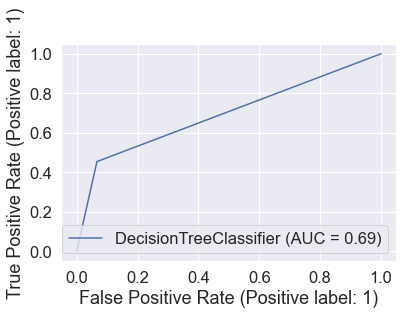

In [27]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

###  KNN 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predict)
print('The accuracy of the model is ',round(accuracy*100,2),'%')

cm = confusion_matrix(y_test, knn_predict)
print("Confusion Matrix:")
print(cm)

print(classification_report(y_test, knn_predict))

The accuracy of the model is  87.0 %
Confusion Matrix:
[[322  23]
 [ 29  26]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       345
           1       0.53      0.47      0.50        55

    accuracy                           0.87       400
   macro avg       0.72      0.70      0.71       400
weighted avg       0.86      0.87      0.87       400



<AxesSubplot:>

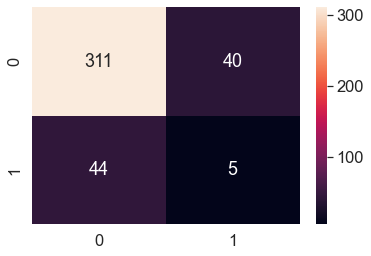

In [33]:
sns.set(font_scale=1.5)
cm = confusion_matrix( knn_predict, y1_test)
sns.heatmap(cm, annot=True, fmt='g')

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 2)
rfc.fit(X_test,y_test)
rfc_predict = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_predict)
print('The accuracy of the model is ',round(accuracy*100,2),'%')

cm = confusion_matrix(y_test, rfc_predict)
print("Confusion Matrix:")
print(cm)

print(classification_report(y_test, rfc_predict))

The accuracy of the model is  95.5 %
Confusion Matrix:
[[344   1]
 [ 17  38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       345
           1       0.97      0.69      0.81        55

    accuracy                           0.95       400
   macro avg       0.96      0.84      0.89       400
weighted avg       0.96      0.95      0.95       400



<AxesSubplot:>

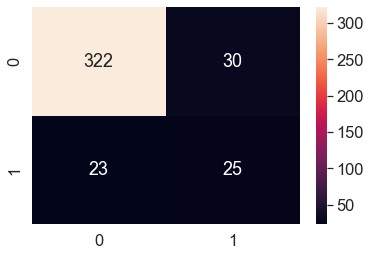

In [35]:
sns.set(font_scale=1.5)
cm = confusion_matrix( y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

<function matplotlib.pyplot.show(close=None, block=None)>

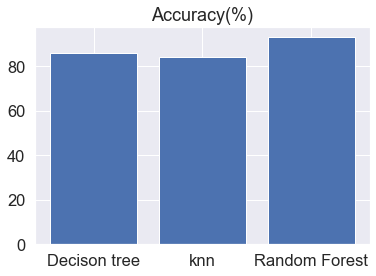

In [36]:
import matplotlib.pyplot as plt
X_axis = ['Decison tree','knn','Random Forest']
Y_axis = [86.03,84.0,93.11]
plt.bar(X_axis,Y_axis)
plt.title('Accuracy(%)')
plt.show